# Abstract

The Cleveland dataset consists of 14 attributes as follows: age (Age), gender (Sex), chest pain type (Chest-pain type), resting blood pressure (Resting Blood Pressure), serum cholesterol level (Serum Cholesterol), fasting blood sugar (Fasting Blood Sugar), resting electrocardiographic results (Resting ECG), maximum heart rate achieved (Max heart rate achieved), exercise-induced angina (Exercise induced angina), ST depression induced by exercise relative to rest (ST depression induced by exercise relative to rest), peak exercise ST segment (Peak exercise ST segment), number of major vessels (0–3) colored by fluoroscopy (Number of major vessels (0–3) colored by fluoroscopy), thalassemia (displays the thalassemia), and heart disease diagnosis (Diagnosis of heart disease, where 0 represents no disease and 1, 2, 3, 4 represent the presence of disease). The Cleveland dataset consists of 303 samples with the above 14 attributes

# Preview data

In [10]:
# import library
import numpy as np
import pandas as pd

In [11]:
# read data
data = pd.read_csv("./data/cleveland.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [12]:
# set name for columns
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Target columns

In [14]:
data["target"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

(Diagnosis of heart disease, where 0 represents no disease and 1, 2, 3, 4 represent the presence of disease)

In [15]:
data["target"] = data["target"].map({0:0, 1:1, 2:1, 3:1, 4:1})
data["target"].value_counts()

0    164
1    139
Name: target, dtype: int64

# Check missing_count of missing value

In [20]:
# Compute missing value of each feature
def display_missing(df,feature):
    n_rows = df.shape[0]
    missing_count = df[feature].isnull().sum()
    return missing_count

In [24]:
missing_df = dict()
missing_df["feature"] = data.columns
missing_df["missing_count"] = [display_missing(data,feature) for feature in data.columns]
missing_df = pd.DataFrame(missing_df)
missing_df[missing_df["missing_count"] > 0]

,feature,missing_count
11,ca,4
12,thal,2


handle missing value

In [26]:
data["ca"] = data["ca"].fillna(data["ca"].mean())
data["thal"] = data["thal"].fillna(data["thal"].mean())
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Analysis

## 01. Feature Classification: Categorical vs Numerical

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


check unique value

In [28]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [29]:
# Convert simultaneously columns that belong categorical
def convert_dtype_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

In [32]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

In [33]:
convert_dtype_category(data, categorical_features)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


describe

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [37]:
data.describe(include = ["category"]).T

,count,unique,top,freq
sex,303.0,2.0,1.0,206.0
cp,303.0,4.0,4.0,144.0
fbs,303.0,2.0,0.0,258.0
restecg,303.0,3.0,0.0,151.0
exang,303.0,2.0,0.0,204.0
slope,303.0,3.0,1.0,142.0
ca,303.0,5.0,0.0,176.0
thal,303.0,4.0,3.0,166.0
target,303.0,2.0,0.0,164.0


## 02. Exploratory Data Analysis (EDA)

Target

In [38]:
data["target"].value_counts().to_frame()

,target
0,164
1,139


In [39]:
data["target"].value_counts(normalize = True).to_frame()

,target
0,0.541254
1,0.458746


In [41]:
#Convert to string type
data["target"] = data["target"].apply(lambda x: str(x))

EDA for categorical features

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [42]:
len(categorical_features)

9

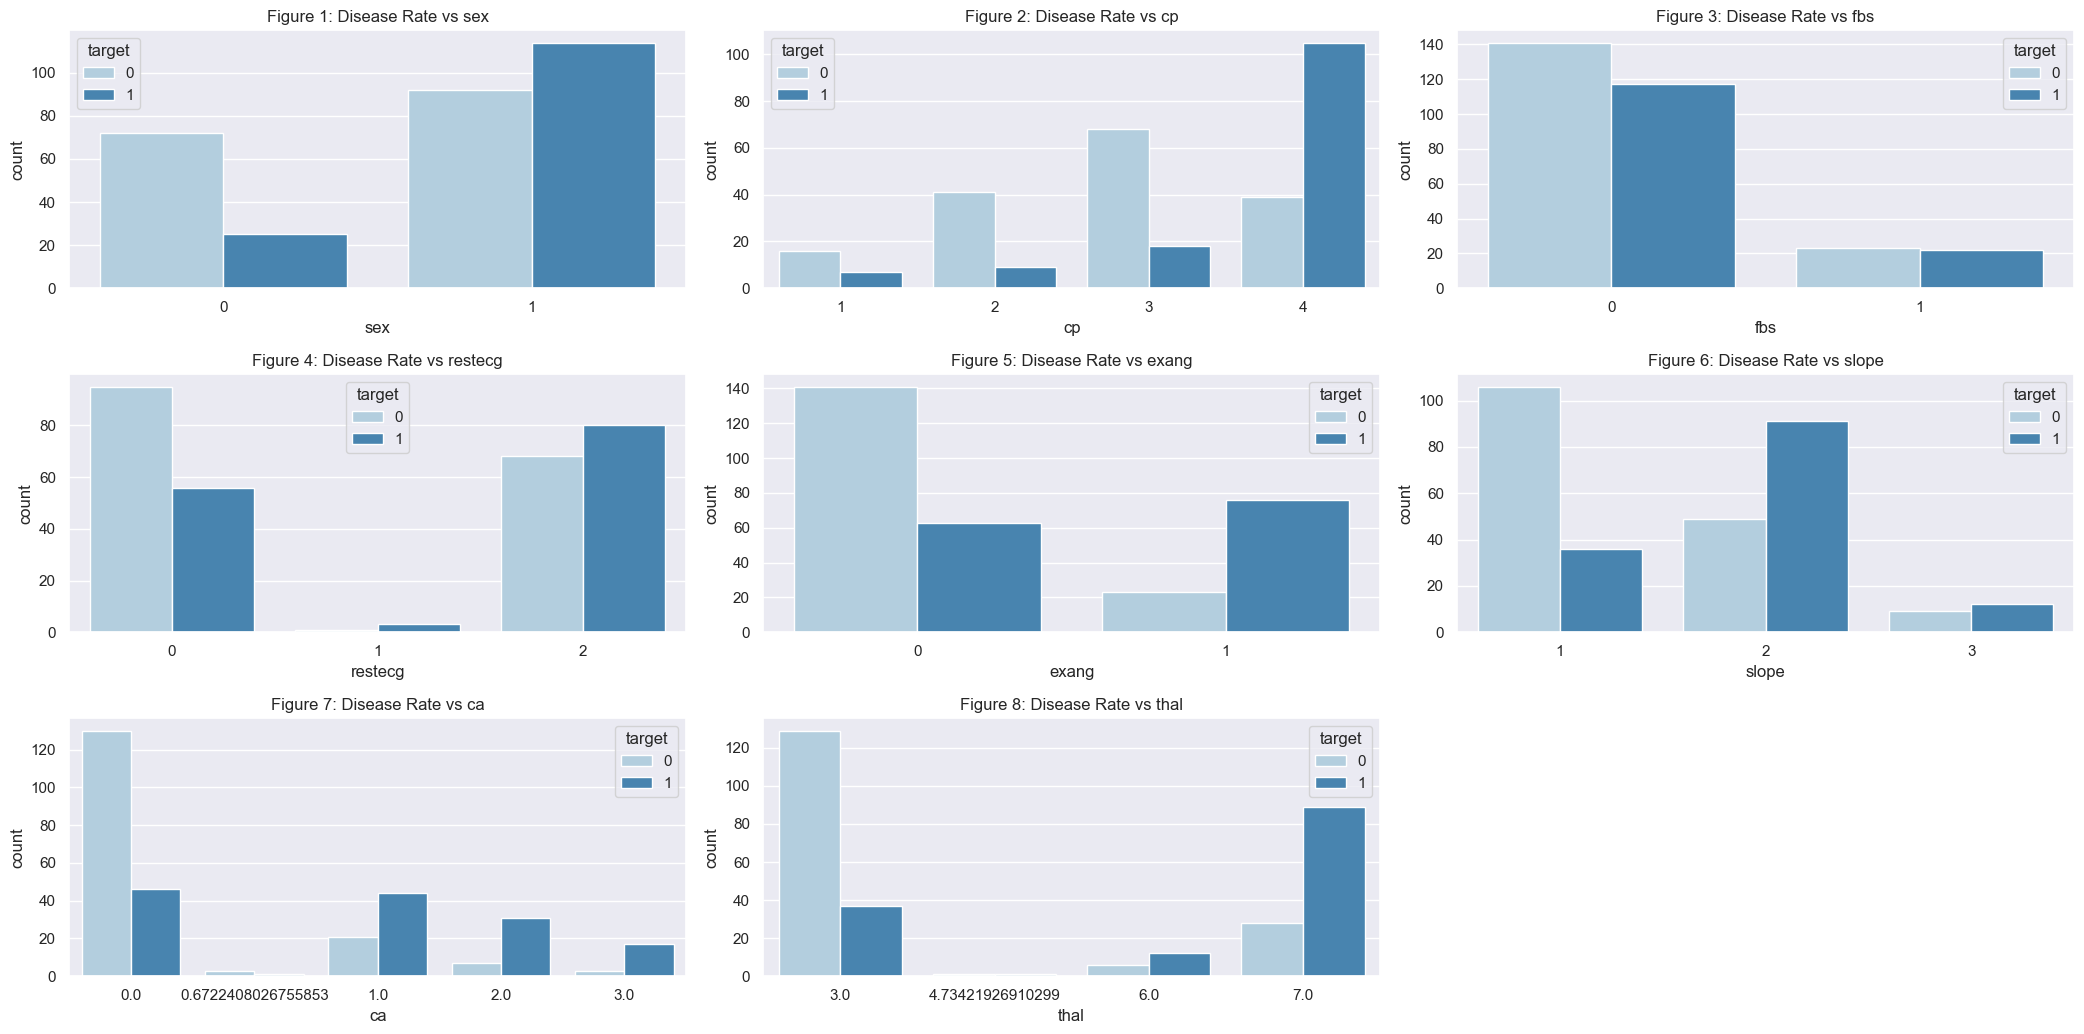

In [46]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_rows*7,n_cols*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if i < len(categorical_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.countplot(data= data, x = categorical_features[i], hue = "target", palette = "Blues", ax = ax_i);
            ax_i.set_title(f"Figure {i+1}: Disease Rate vs {categorical_features[i]}")
            
ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout()
plt.show();

EDA for categorical features

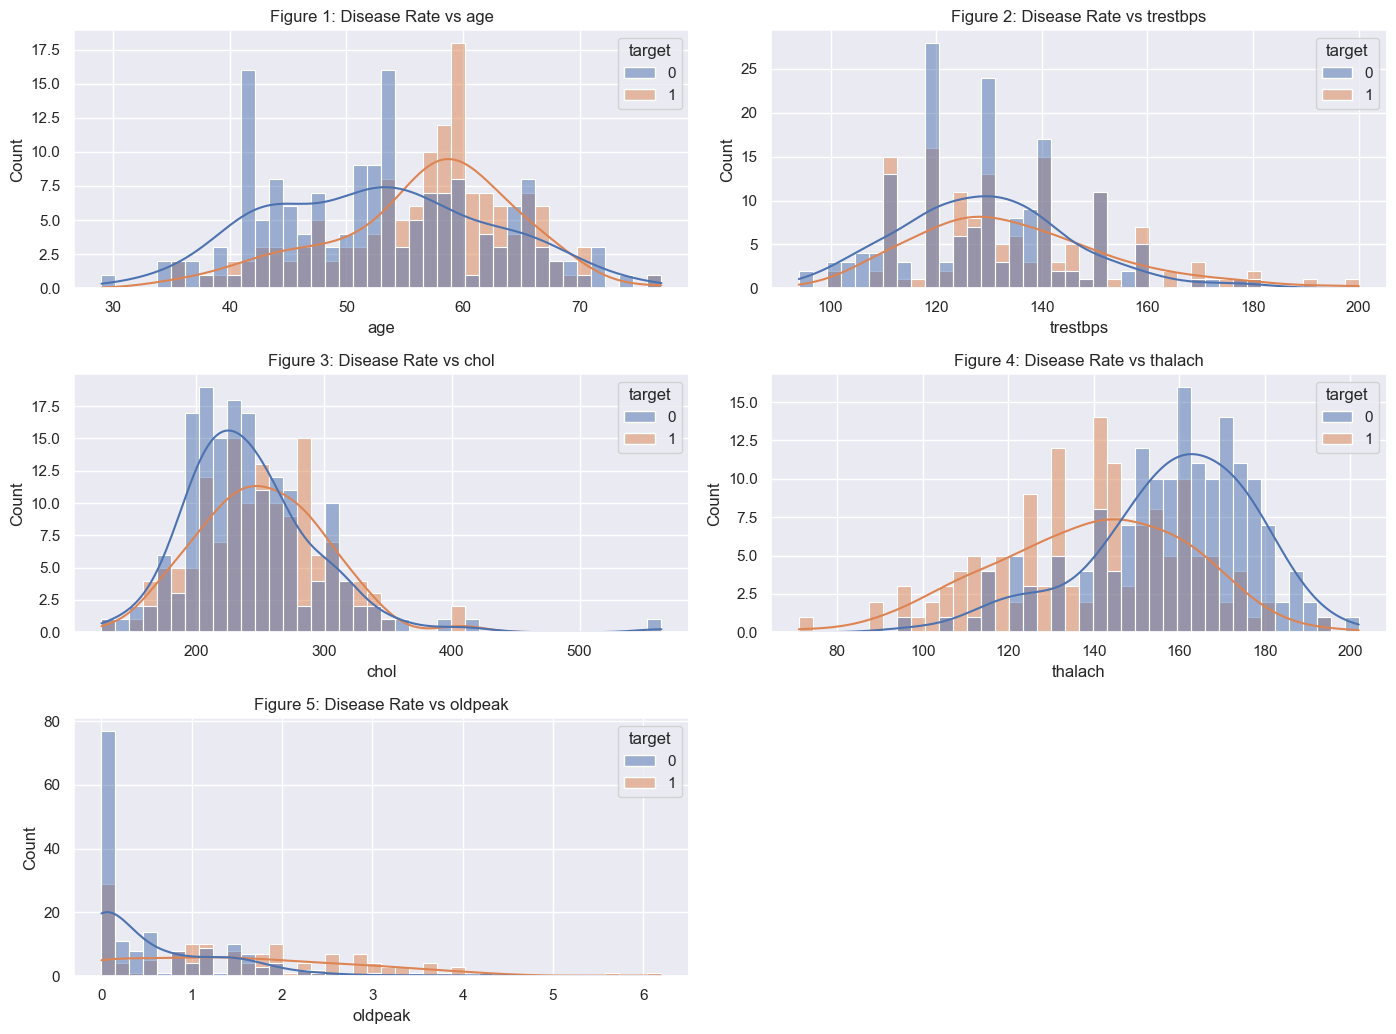

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
n_rows = 3
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c # index to loop through list "cols"
        if i < len(numerical_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.histplot(data=data, x=numerical_features[i], bins=40, kde=True, hue="target",  ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Disease Rate vs {numerical_features[i]}")

ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout()
plt.show();

# KNN to predict 

In [48]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

KNN model

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


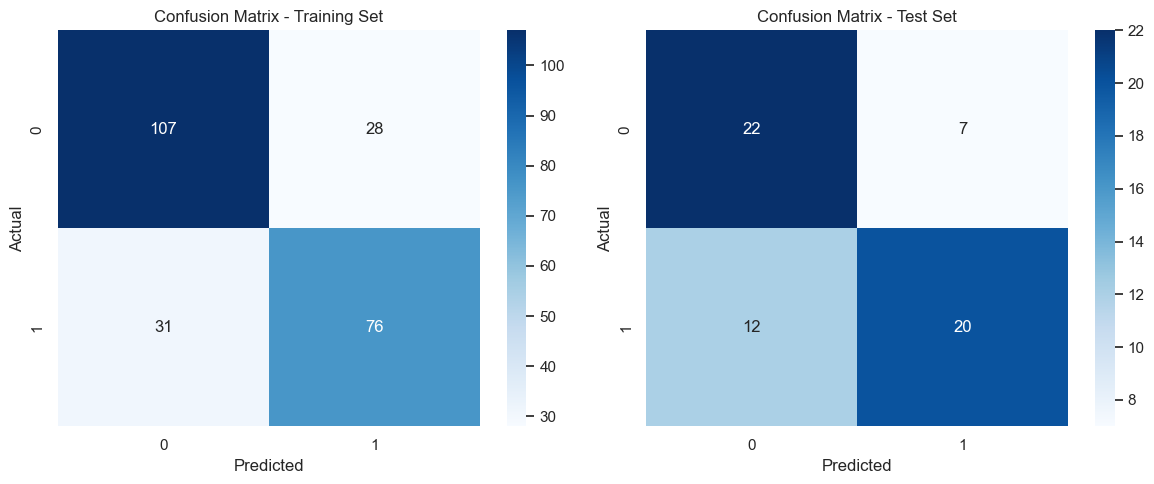

In [51]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# SVM to predict

In [52]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


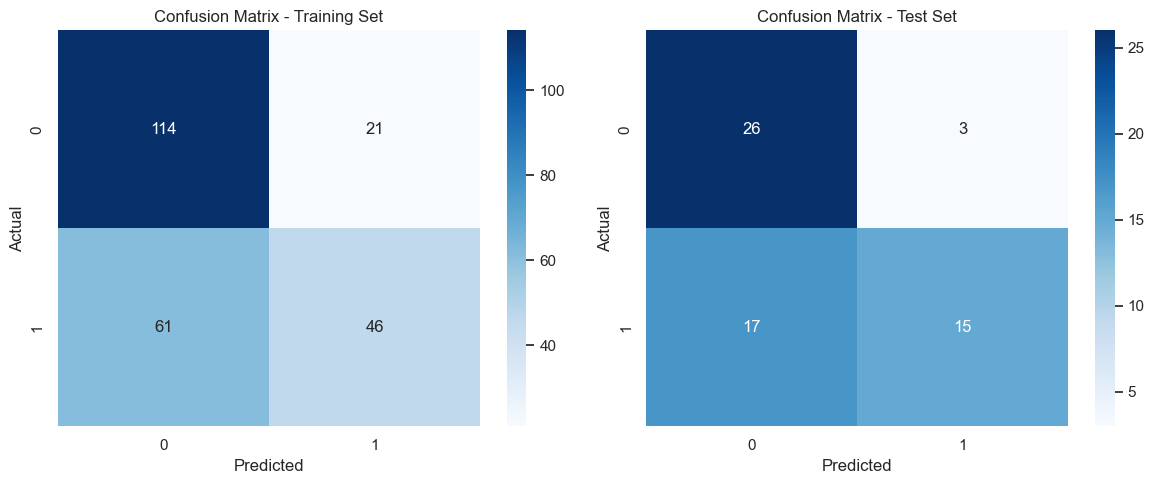

In [53]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# Native Bayes to predict

In [55]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for NaiveBayesClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for NaiveBayesClassifier = {accuracy_for_test}')

Accuracy for training set for NaiveBayesClassifier = 0.85
Accuracy for test set for NaiveBayesClassifier = 0.84


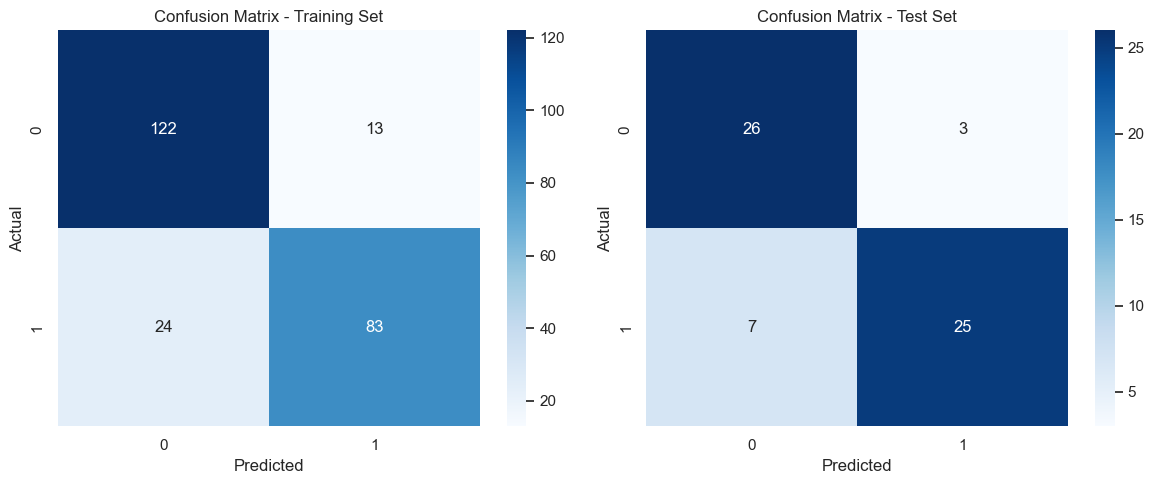

In [56]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# Random Forest to predict

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for RandomForestClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for RandomForestClassifier = {accuracy_for_test}')

Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


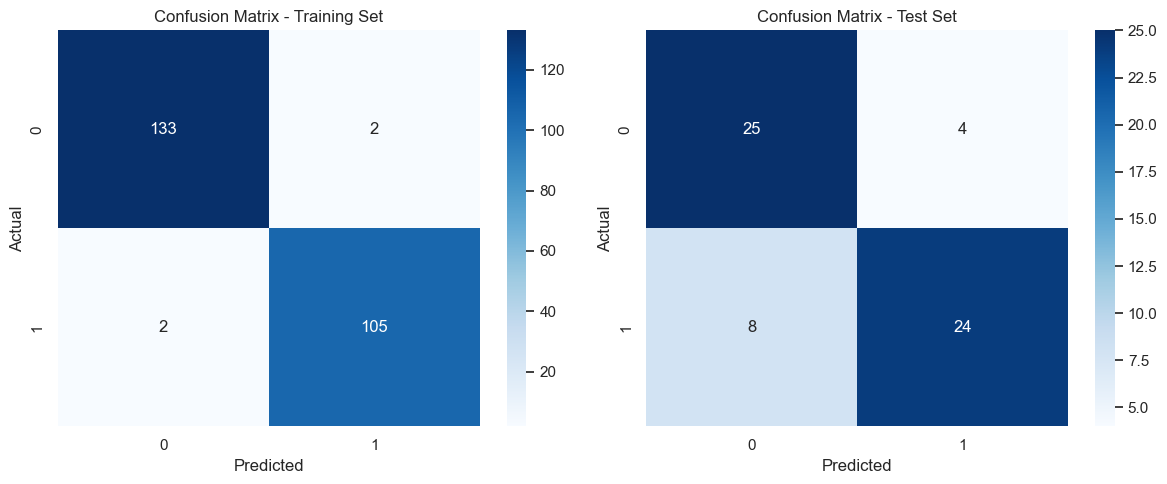

In [58]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# Adaboost to predict

In [59]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for AdaBoostClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for AdaBoostClassifier = {accuracy_for_test}')

Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


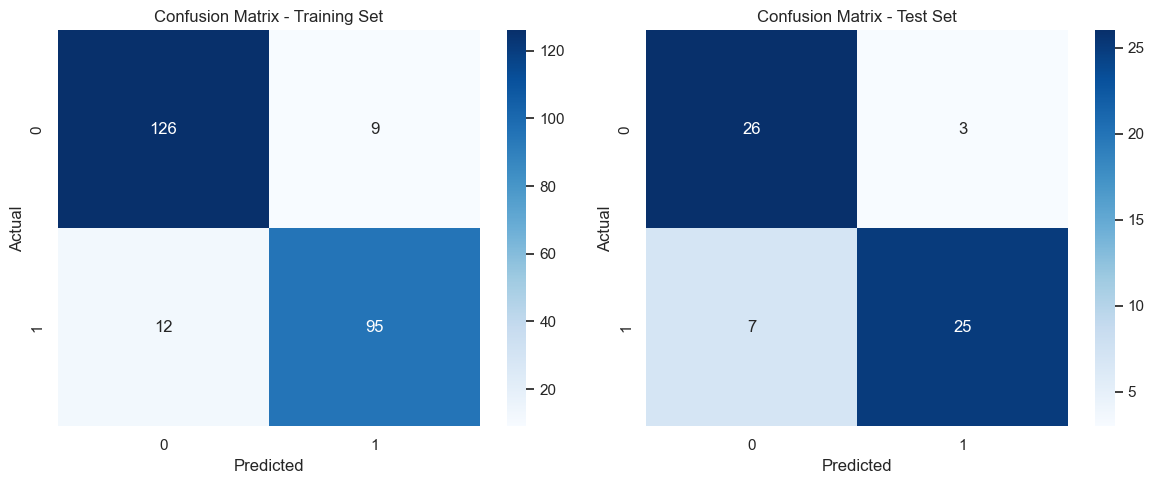

In [60]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# GradientBoost to predict

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoostingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoostingClassifier = {accuracy_for_test}')

Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


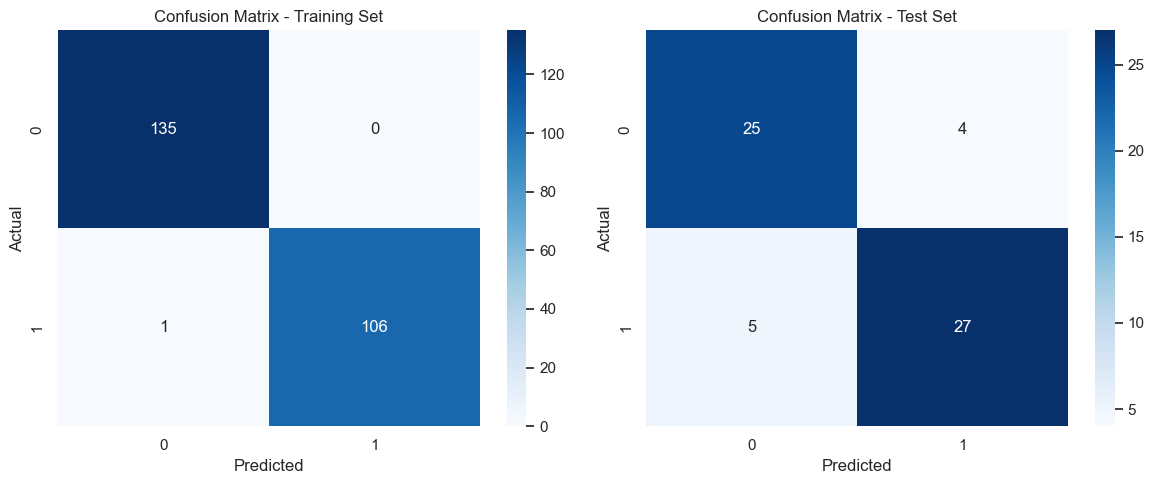

In [62]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# XGBoost to predict

In [73]:
data["target"] = data["target"].astype("int64")

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


In [75]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGBClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for XGBClassifier = {accuracy_for_test}')

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


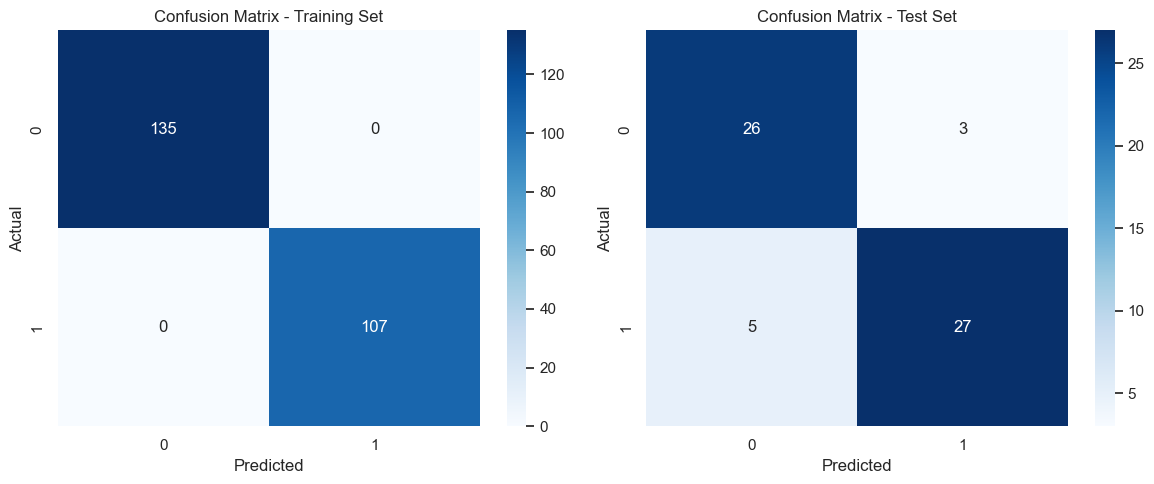

In [77]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Logistic Regression to predict

In [78]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for LogisticRegression = {accuracy_for_train}')
print(f'Accuracy for test set for LogisticRegression = {accuracy_for_test}')

Accuracy for training set for LogisticRegression = 0.84
Accuracy for test set for LogisticRegression = 0.89


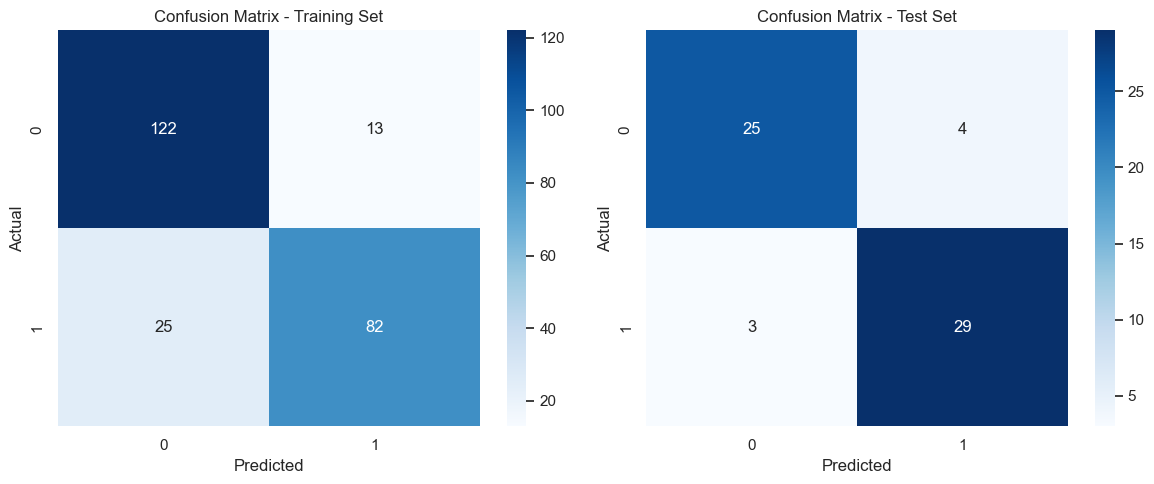

In [79]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

# Neural Networks (MLPClassifier) to predict

In [80]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for MLPClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for MLPClassifier = {accuracy_for_test}')

Accuracy for training set for MLPClassifier = 0.83
Accuracy for test set for MLPClassifier = 0.9


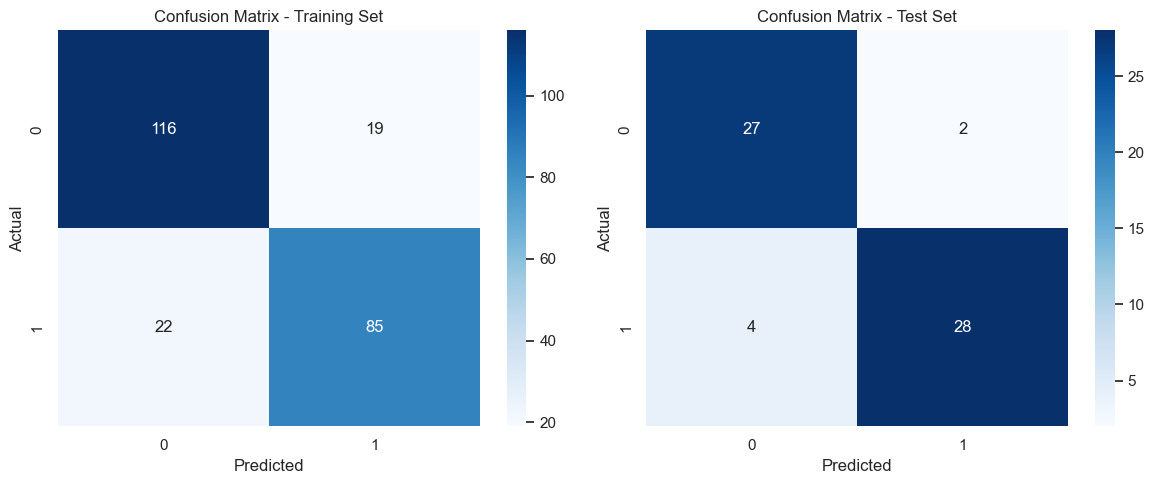

In [81]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Stacking to predict

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [91]:
# Define base learners
base_learners = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
]

# Train Stacking Classifier model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(random_state=42))
stacking_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for StackingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for StackingClassifier = {accuracy_for_test}')

Accuracy for training set for StackingClassifier = 0.96
Accuracy for test set for StackingClassifier = 0.95


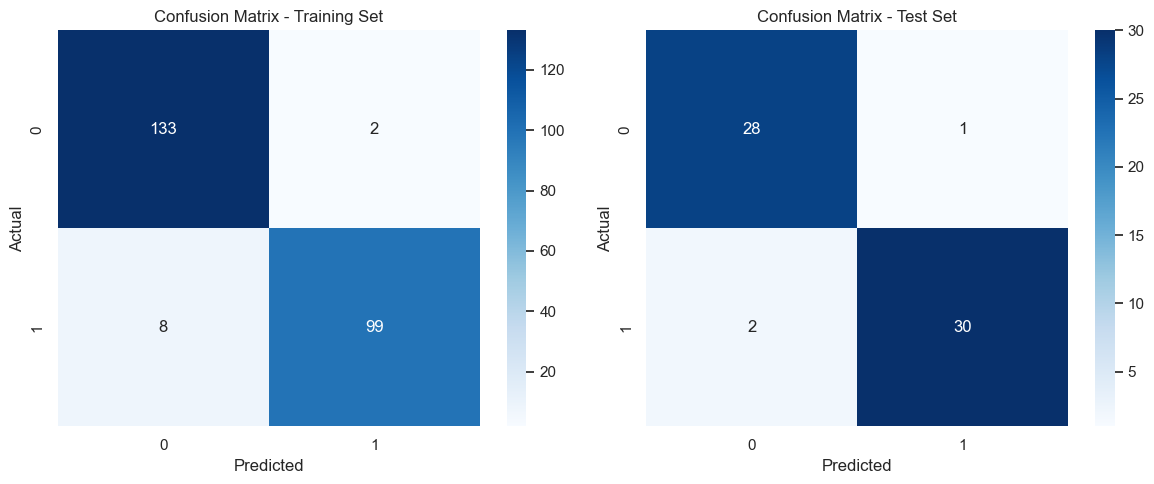

In [92]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();